## Introduction

In today’s digital era, fake news has become one of the most serious issues across social media and online platforms. People often get misled by false information, which spreads faster than verified news. To address this problem, this project — “Fake News Detection using Machine Learning” — focuses on identifying whether a news article is real or fake based on its content.

This system uses Natural Language Processing (NLP) and Machine Learning algorithms to analyze the text of news articles. The project involves several important steps such as:

* Data Collection: Using datasets containing real and fake news articles.
* Data Preprocessing: Cleaning text by removing punctuation, stopwords, and unwanted symbols.
* Feature Extraction: Converting text into numerical form using TF-IDF Vectorization.
* Model Training: Applying machine learning algorithms like Logistic Regression, Naive Bayes, or Random Forest.
* Evaluation: Measuring performance through Accuracy Score, Confusion Matrix, and Classification Report.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import time
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
fake_df = pd.read_csv(r'fake.csv')
true_df = pd.read_csv(r'true.csv')

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_df['class'] = 0
true_df['class'] = 1

In [6]:
fake_df.shape

(23481, 5)

In [7]:
true_df.shape

(21417, 5)

In [8]:
fake_df_mannual_testing = fake_df.tail(10)

for i in range(23480,23470,-1):
    fake_df.drop([i],axis = 0, inplace = True)

In [9]:
true_df_mannual_testing = true_df.tail(10)

for i in range(21416,21406,-1):
    true_df.drop([i],axis = 0, inplace = True)

In [10]:
fake_df.shape , true_df.shape

((23471, 5), (21407, 5))

In [11]:
fake_df_mannual_testing['class'] = 0
true_df_mannual_testing['class'] = 1

In [12]:
fake_df_mannual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [13]:
true_df_mannual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [14]:
new_df = pd.concat([fake_df,true_df],axis=0)

In [15]:
new_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [16]:
new_df.shape

(44878, 5)

In [17]:
new_df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
new_df = new_df.drop(['title' , 'subject' ,'date'] , axis=1)

In [19]:
new_df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


In [20]:
new_df.isna().sum()

text     0
class    0
dtype: int64

In [21]:
new_df = new_df.sample(frac = 1)

In [22]:
new_df.head()

,text,class
13217,This is a great story for anyone who doesn t u...,0
5892,TORONTO (Reuters) - More than 200 Canadian tec...,1
652,It s certainly no secret that Trump struggles ...,0
7469,"On Wednesday morning, President Obama nominate...",0
10393,Brigitte Macron is 24 years older than her hus...,0


In [23]:
new_df.reset_index(inplace = True)

In [24]:
new_df.drop(['index'],axis=1,inplace = True)

In [25]:
new_df.columns

Index(['text', 'class'], dtype='object')

In [26]:
new_df.head()

,text,class
0,This is a great story for anyone who doesn t u...,0
1,TORONTO (Reuters) - More than 200 Canadian tec...,1
2,It s certainly no secret that Trump struggles ...,0
3,"On Wednesday morning, President Obama nominate...",0
4,Brigitte Macron is 24 years older than her hus...,0


### Label Distribution Plot

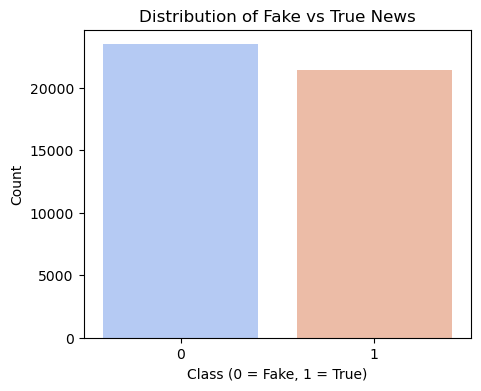

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=new_df, palette='coolwarm')
plt.title("Distribution of Fake vs True News")
plt.xlabel("Class (0 = Fake, 1 = True)")
plt.ylabel("Count")
plt.show()

### Word Count / Text Length Distribution

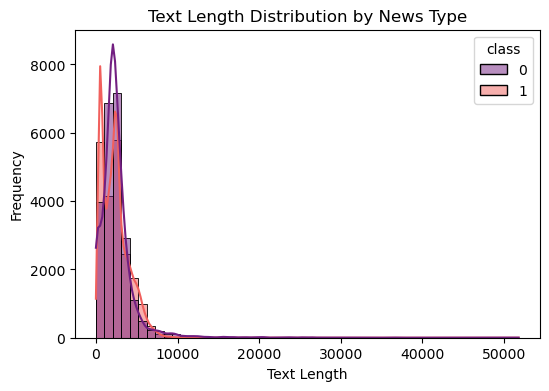

In [28]:
new_df['text_length'] = new_df['text'].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(data=new_df, x='text_length', hue='class', bins=50, kde=True, palette='magma')
plt.title("Text Length Distribution by News Type")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

### Most Frequent Words (WordCloud)

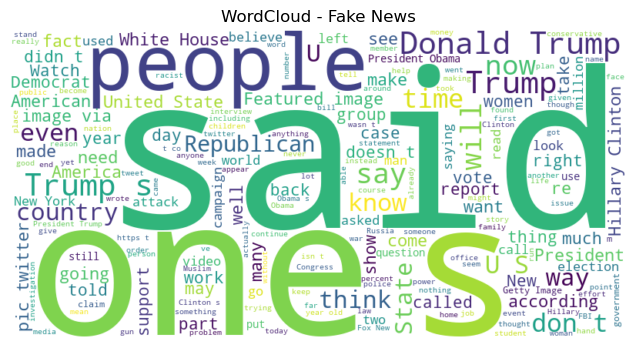

In [29]:
# Fake News
from wordcloud import WordCloud

fake_text = " ".join(new_df[new_df['class']==0]['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake News")
plt.show()

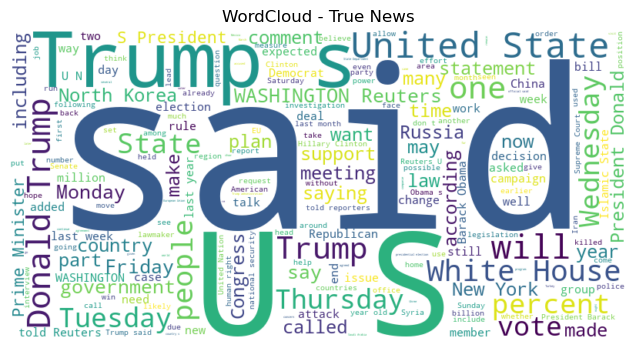

In [30]:
# True News
true_text = " ".join(new_df[new_df['class']==1]['text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - True News")
plt.show()

In [31]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W',' ',text)
    text = re.sub('https?://\S+|www.\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [32]:
new_df['text'] = new_df['text'].apply(wordopt)

In [33]:
x = new_df['text']
y = new_df['class']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test = vectorizer.transform(x_test) 

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(xv_train, y_train)

LogisticRegression()

In [40]:
pred_lr = lr.predict(xv_test)

In [41]:
lr.score(xv_test,y_test)*100

98.71880570409982

In [42]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4699
           1       0.98      0.99      0.99      4277

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt = DecisionTreeClassifier()

In [45]:
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [46]:
pred_dt = dt.predict(xv_test)

In [47]:
dt.score(xv_test, y_test)*100

99.74376114081997

In [48]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4699
           1       1.00      1.00      1.00      4277

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gb = GradientBoostingClassifier(random_state=0)

In [51]:
gb.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [52]:
pred_gb = gb.predict(xv_test)

In [53]:
gb.score(xv_test, y_test)*100

99.57664884135473

In [54]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4699
           1       0.99      1.00      1.00      4277

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc.fit(xv_train, y_train)

In [ ]:
pred_rfc = gb.predict(xv_test)

In [ ]:
rfc.score(xv_test, y_test)*100

In [ ]:
print(classification_report(y_test,pred_rfc))

### Prediction

In [ ]:
def output_label(n):
    return "!!!Fake News!!!" if n == 0 else "--- Real News ---"

In [ ]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_df_test = pd.DataFrame(testing_news)
    new_df_test['text'] = new_df_test['text'].apply(wordopt)
    new_x_test = new_df_test['text']
    new_xv_test = vectorizer.transform(new_x_test)

    # Predictions
    pred_lr = lr.predict(new_xv_test)[0]
    pred_dt = dt.predict(new_xv_test)[0]
    pred_gb = gb.predict(new_xv_test)[0]
    pred_rfc = rfc.predict(new_xv_test)[0]

    # Probabilities
    prob_lr = lr.predict_proba(new_xv_test).max() * 100
    prob_dt = dt.predict_proba(new_xv_test).max() * 100
    prob_gb = gb.predict_proba(new_xv_test).max() * 100
    prob_rfc = rfc.predict_proba(new_xv_test).max() * 100

    # Print clean formatted results
    print("-"*60)
    print("Here this Result")
    time.sleep(1)
    print(f"Logistic Regression            : {output_label(pred_lr)}")
    print(f"Decision Tree Classifier       : {output_label(pred_dt)}")
    print(f"Gradient Boosting Classifier   : {output_label(pred_gb)}")
    print(f"Random Forest Classifier       : {output_label(pred_rfc)}")


In [ ]:
news = str(input("Enter a news article to predict.: "))
manual_testing(news)

### Confusion Matrix (for best model)

In [ ]:
cm = confusion_matrix(y_test, pred_lr) 
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Save model
import pickle

# model = trained LogisticRegression model
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

## Conclusion

The Fake News Detection project successfully demonstrates how machine learning and NLP can be combined to solve a real-world social problem. The model analyzes linguistic patterns and predicts whether a given news article is true or fake with high accuracy.

Key outcomes and learnings from this project include:

* Accurate Classification: The model provides reliable results in identifying fake news articles.
* Practical Application: Can be integrated into real-world platforms to flag misinformation.
* Technical Skills: Strengthened knowledge of Python, NLP, and ML libraries like Scikit-learn, Pandas, and Matplotlib.
* Ethical Awareness: Emphasizes responsible use of AI to promote truthful information.